# Tugas 2

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Data
df = pd.read_csv('E:\kuliah\smt5\machine-learning\spam.csv', encoding='latin-1')

# Drop kolom tidak perlu
df = df.drop(df.iloc[:, 2:], axis=1)

# Ubah nama kolom
df.columns = ['Labels', 'SMS']

# Encode label (spam = 1, ham = 0)
label_map = {'spam': 1, 'ham': 0}
df['Labels'] = df['Labels'].map(label_map)

# Pisahkan fitur dan label
X = df['SMS'].values
y = df['Labels'].values

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    - Menggunakan data spam.csv
    - Fitur CountVectorizer dengan mengaktifkan stop_words
    - Evaluasi hasilnya

In [2]:
# Inisialisasi CountVectorizer dengan stop_words
cv = CountVectorizer(stop_words='english')

# Fit dan transform data training
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Inisialisasi model MultinomialNB
mnb_cv = MultinomialNB()
mnb_cv.fit(X_train_cv, y_train)

# Prediksi
y_pred_cv = mnb_cv.predict(X_test_cv)

# Evaluasi
acc_cv = accuracy_score(y_test, y_pred_cv)
print(f"Akurasi (CountVectorizer): {acc_cv}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_cv))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_cv))

Akurasi (CountVectorizer): 0.9838565022421525

Confusion Matrix:
 [[959   6]
 [ 12 138]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    - Menggunakan data spam.csv
    - Fitur TF-IDF dengan mengaktifkan stop_words
    - Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
    - Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [3]:
# Inisialisasi TF-IDF Vectorizer dengan stop_words
tfidf = TfidfVectorizer(stop_words='english')

# Fit dan transform data training
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Inisialisasi model MultinomialNB
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)

# Prediksi
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)

# Evaluasi
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Akurasi (TF-IDF): {acc_tfidf}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_tfidf))

Akurasi (TF-IDF): 0.9668161434977578

Confusion Matrix:
 [[965   0]
 [ 37 113]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



### Perbandingan Akurasi


===== Perbandingan Akurasi =====
Akurasi CountVectorizer : 0.9839
Akurasi TF-IDF          : 0.9668


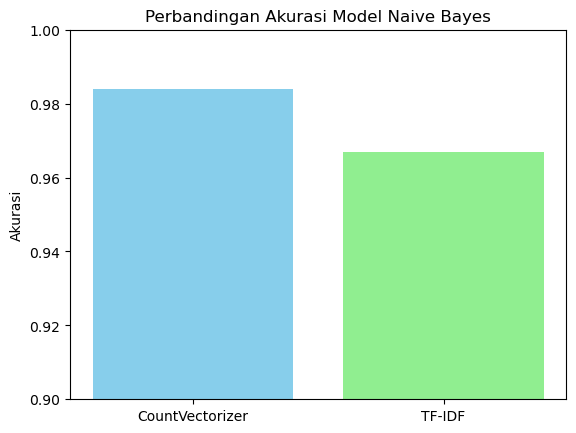

In [4]:
print("\n===== Perbandingan Akurasi =====")
print(f"Akurasi CountVectorizer : {acc_cv:.4f}")
print(f"Akurasi TF-IDF          : {acc_tfidf:.4f}")

# Visualisasi Perbandingan
plt.bar(['CountVectorizer', 'TF-IDF'], [acc_cv, acc_tfidf], color=['skyblue', 'lightgreen'])
plt.title('Perbandingan Akurasi Model Naive Bayes')
plt.ylabel('Akurasi')
plt.ylim(0.9, 1.0)
plt.show()

CountVectorizer memberikan hasil akurasi yang lebih baik pada dataset spam.csv